In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
plot_error_training = []
plot_error_validasi = []
plot_akurasi_training = []
plot_akurasi_validasi = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 10, 5, 1)
        self.fc1 = nn.Linear(4*4*10, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*10)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
def train(model, device, train_loader,test_loader, optimizer, epoch):
    model.eval()
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0 and batch_idx * len(data) == 0:
            correct = 0
        if batch_idx % 10 == 0 and batch_idx * len(data) != 0:
            plot_error_training.append(loss.item())
            plot_akurasi_training.append(correct /10000)
            correct = 0
            test(model, device, test_loader)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    plot_error_validasi.append(test_loss)
    plot_akurasi_validasi.append(correct / len(test_loader.dataset))


In [0]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=1000, shuffle=True)
  
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=100, shuffle=True)



In [75]:
def main():
   
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(1)

    device = torch.device("cuda" if use_cuda else "cpu")

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.8, momentum=0.5)

    for epoch in range(1, 10 + 1):
        train(model, device, train_loader,test_loader, optimizer, epoch)
        

        
if __name__ == '__main__':
    main()

Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.299998	 Accuracy: 1460/10000 (15%)


Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.300344	 Accuracy: 1090/10000 (11%)


Test set: Average loss: 2.3015, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.302160	 Accuracy: 1108/10000 (11%)


Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.301209	 Accuracy: 1123/10000 (11%)


Test set: Average loss: 2.3019, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.302117	 Accuracy: 1148/10000 (11%)


Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.298172	 Accuracy: 1170/10000 (12%)


Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.299843	 Accuracy: 1150/10000 (12%)


Test set: Average loss: 2.3017, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [3000

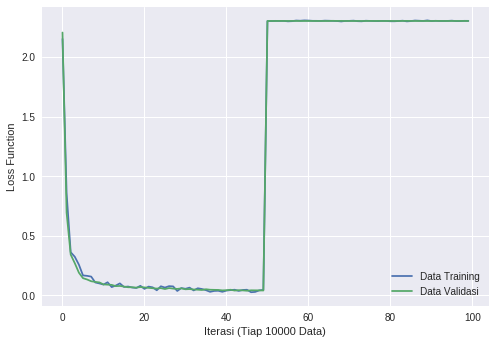

In [76]:
# Hasil Loss Function Split
plt.plot(plot_error_training,label="Data Training")
plt.plot(plot_error_validasi,label="Data Validasi")
# plt.axis([25,50,-0.25,0.75])
plt.ylabel('Loss Function')
plt.xlabel('Iterasi (Tiap 10000 Data)')
plt.legend()



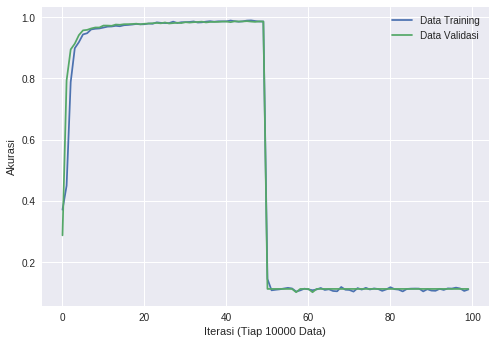

In [77]:
# Hasil Accuracy Split
plt.plot(plot_akurasi_training,label="Data Training")
plt.plot(plot_akurasi_validasi,label="Data Validasi")
plt.ylabel('Akurasi')
# plt.axis([25,50,0.8,1])
plt.xlabel('Iterasi (Tiap 10000 Data)')
plt.legend()